In [1]:
#load data
!pip -q install ucimlrepo

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

abalone = fetch_ucirepo(id=1)

X = abalone.data.features
y = abalone.data.targets

# OneHotEncoder for 'Sex'
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X[['Sex']])

encoded_sex = enc.transform(X[['Sex']]).toarray()
encoded_df = pd.DataFrame(encoded_sex, columns=enc.get_feature_names_out(['Sex']))

# ensure index alignment before concatenation
encoded_df.index = X.index

# combine encoded columns with numeric features
X_encoded = pd.concat([X.drop('Sex', axis=1), encoded_df], axis=1)

print(X_encoded.head())

   Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Sex_F  Sex_I  Sex_M  
0         0.150    0.0    0.0    1.0  
1         0.070    0.0    0.0    1.0  
2         0.210    1.0    0.0    0.0  
3         0.155    0.0    0.0    1.0  
4         0.055    0.0    1.0    0.0  


In [3]:
X_encoded.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.0,1.0,0.0


In [4]:
df = pd.concat([X_encoded, y], axis=1)

In [5]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,0.312904,0.321283,0.365813,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,0.463731,0.467025,0.481715,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000,0.000000,0.000000,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,0.000000,0.000000,0.000000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,0.000000,0.000000,0.000000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,1.000000,1.000000,1.000000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,1.000000,1.000000,1.000000,29.000000


In [6]:
df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0.0,0.0,1.0,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0.0,0.0,1.0,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1.0,0.0,0.0,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0.0,0.0,1.0,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.0,1.0,0.0,7


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole_weight    4177 non-null   float64
 4   Shucked_weight  4177 non-null   float64
 5   Viscera_weight  4177 non-null   float64
 6   Shell_weight    4177 non-null   float64
 7   Sex_F           4177 non-null   float64
 8   Sex_I           4177 non-null   float64
 9   Sex_M           4177 non-null   float64
 10  Rings           4177 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 359.1 KB


In [8]:
df.isnull().sum()

,0
Length,0
Diameter,0
Height,0
Whole_weight,0
Shucked_weight,0
Viscera_weight,0
Shell_weight,0
Sex_F,0
Sex_I,0
Sex_M,0


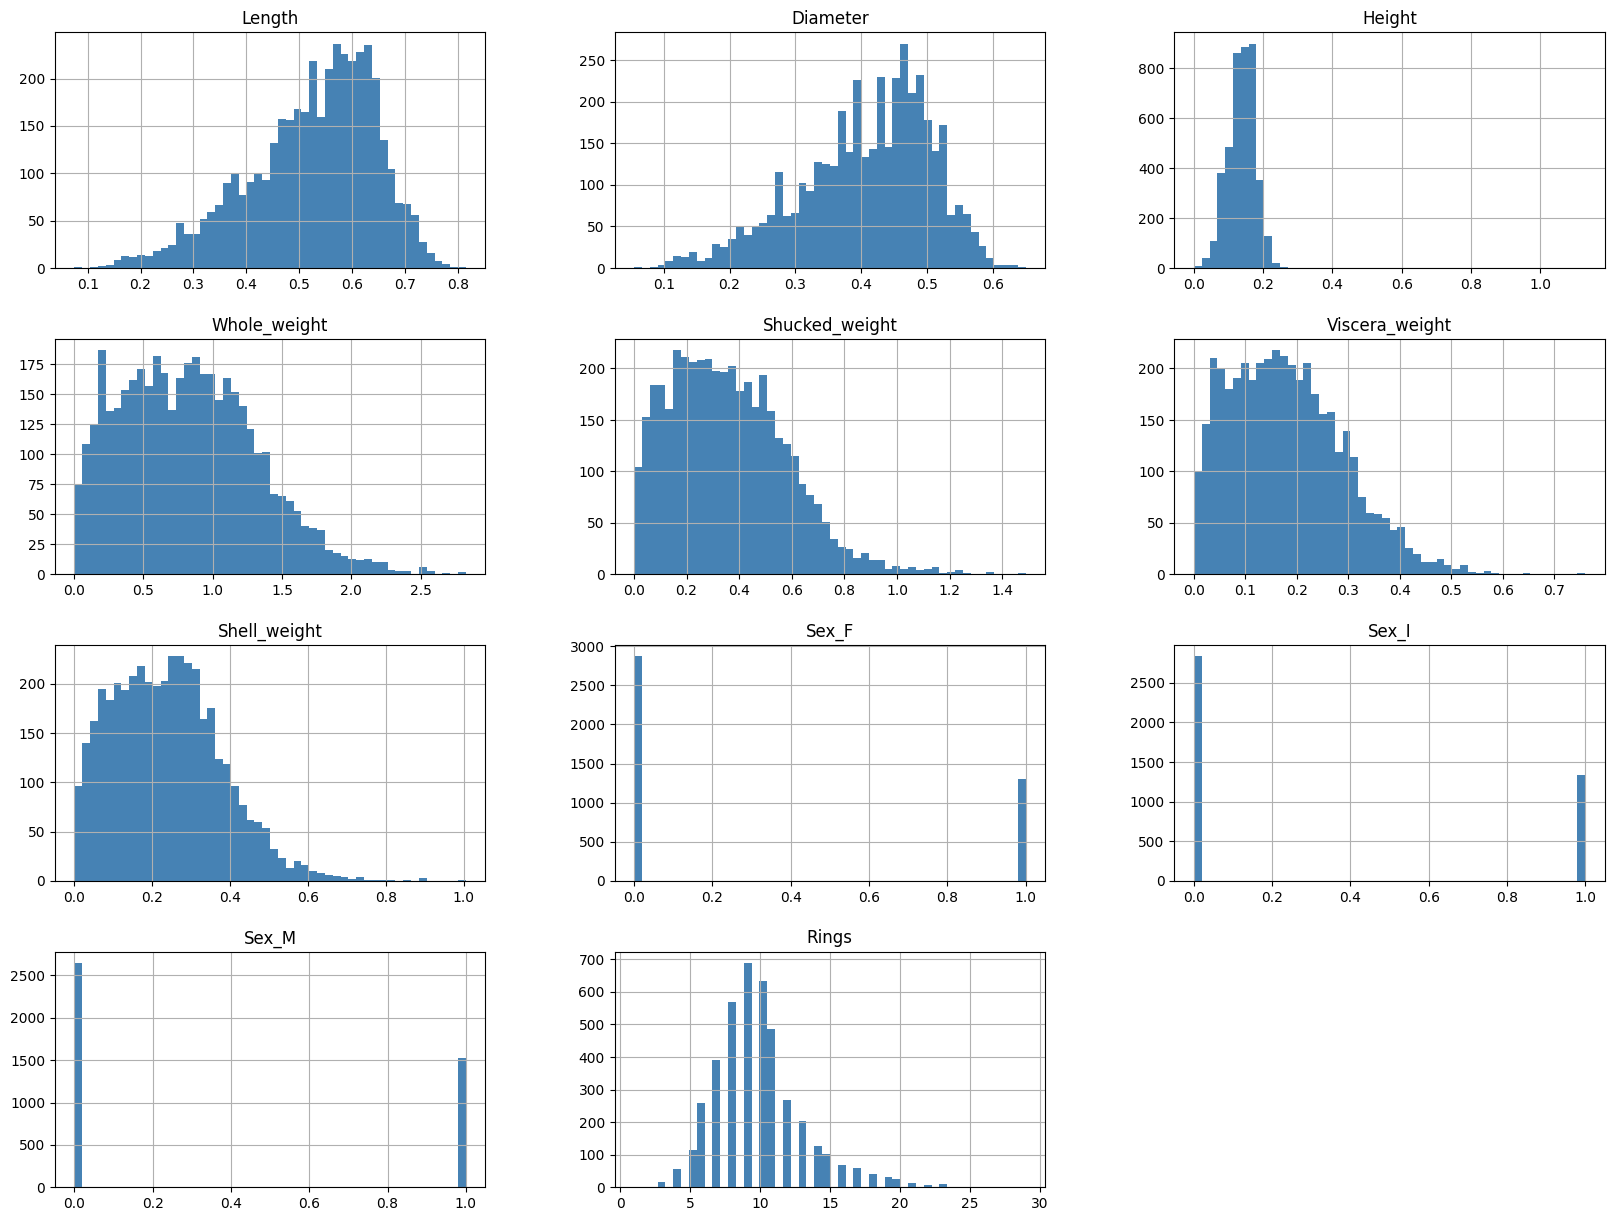

In [9]:
#column histogram
mpl.rc('axes', labelsize=10)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(20,15), color="steelblue")
plt.show()

In [10]:
#split test
X = df.drop('Rings', axis=1)
y = df['Rings']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, train_size=0.7, random_state=42
)

#drop outliers
train_mean = X_train.mean()
train_std = X_train.std()
outlier_mask = (np.abs(X_train - train_mean) > 3 * train_std).any(axis=1)
X_train = X_train[~outlier_mask]
y_train = y_train[~outlier_mask]

print("\nX_train:\n", X_train.head())
print("\nX_test:\n", X_test.head())
print("\ny_train:\n", y_train.head())
print("\ny_test:\n", y_test.head())

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train:
       Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
2830   0.525     0.430   0.135        0.8435          0.4325          0.1800   
925    0.430     0.325   0.100        0.3645          0.1575          0.0825   
3845   0.455     0.350   0.105        0.4160          0.1625          0.0970   
547    0.205     0.155   0.045        0.0425          0.0170          0.0055   
2259   0.590     0.465   0.160        1.1005          0.5060          0.2525   

      Shell_weight  Sex_F  Sex_I  Sex_M  
2830        0.1815    1.0    0.0    0.0  
925         0.1050    0.0    1.0    0.0  
3845        0.1450    0.0    0.0    1.0  
547         0.0155    0.0    0.0    1.0  
2259        0.2950    1.0    0.0    0.0  

X_test:
       Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
866    0.605     0.455   0.160        1.1035          0.4210          0.3015   
1483   0.590     0.440   0.150        0.8725          0.3870          0.2150   
599   

In [11]:
#additional split tuning
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.3, random_state=42
)

print("X_train_split shape:", X_train_split.shape, "X_val shape:", X_val.shape)

X_train_split shape: (1999, 10) X_val shape: (858, 10)


In [12]:
#find best tree using validation set
best_r2 = -np.inf
best_n_estimators = None
r2_scores = {}

for n in range(50, 301, 10):
    rf_model = RandomForestRegressor(random_state=42, n_estimators=n)
    rf_model.fit(X_train_split, y_train_split)

    val_pred = rf_model.predict(X_val)
    current_r2 = r2_score(y_val, val_pred)
    r2_scores[n] = current_r2

    print(f"Tree(n_estimators): {n}, Val R²: {current_r2:.4f}")

    if current_r2 > best_r2:
        best_r2 = current_r2
        best_n_estimators = n

print("\nBest random forest model(validation):")
print(f"Best tree(n_estimators) = {best_n_estimators}, Best Validation R²: {best_r2:.4f}")

Tree(n_estimators): 50, Val R²: 0.4711
Tree(n_estimators): 60, Val R²: 0.4697
Tree(n_estimators): 70, Val R²: 0.4731
Tree(n_estimators): 80, Val R²: 0.4778
Tree(n_estimators): 90, Val R²: 0.4800
Tree(n_estimators): 100, Val R²: 0.4779
Tree(n_estimators): 110, Val R²: 0.4781
Tree(n_estimators): 120, Val R²: 0.4785
Tree(n_estimators): 130, Val R²: 0.4790
Tree(n_estimators): 140, Val R²: 0.4811
Tree(n_estimators): 150, Val R²: 0.4822
Tree(n_estimators): 160, Val R²: 0.4817
Tree(n_estimators): 170, Val R²: 0.4815
Tree(n_estimators): 180, Val R²: 0.4810
Tree(n_estimators): 190, Val R²: 0.4803
Tree(n_estimators): 200, Val R²: 0.4803
Tree(n_estimators): 210, Val R²: 0.4800
Tree(n_estimators): 220, Val R²: 0.4796
Tree(n_estimators): 230, Val R²: 0.4804
Tree(n_estimators): 240, Val R²: 0.4809
Tree(n_estimators): 250, Val R²: 0.4807
Tree(n_estimators): 260, Val R²: 0.4805
Tree(n_estimators): 270, Val R²: 0.4804
Tree(n_estimators): 280, Val R²: 0.4805
Tree(n_estimators): 290, Val R²: 0.4802
Tree(

In [13]:
#training modell
rf_model = RandomForestRegressor(random_state=42, n_estimators=best_n_estimators)

rf_model.fit(X_train, y_train)

#predict test set
rf_predictions = rf_model.predict(X_test)

#regression metrics
mae = mean_absolute_error(y_test, rf_predictions)
mse = mean_squared_error(y_test, rf_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rf_predictions)

print(f"Mean Absolute Error(MAE): {mae}")
print(f"Mean Squared Error(MSE): {mse}")
print(f"Root Mean Squared Error(RMSE): {rmse}")
print(f"R-squared(R2): {r2}")

Mean Absolute Error(MAE): 1.560627325890484
Mean Squared Error(MSE): 4.844561899698742
Root Mean Squared Error(RMSE): 2.2010365511955365
R-squared(R2): 0.522917473983507


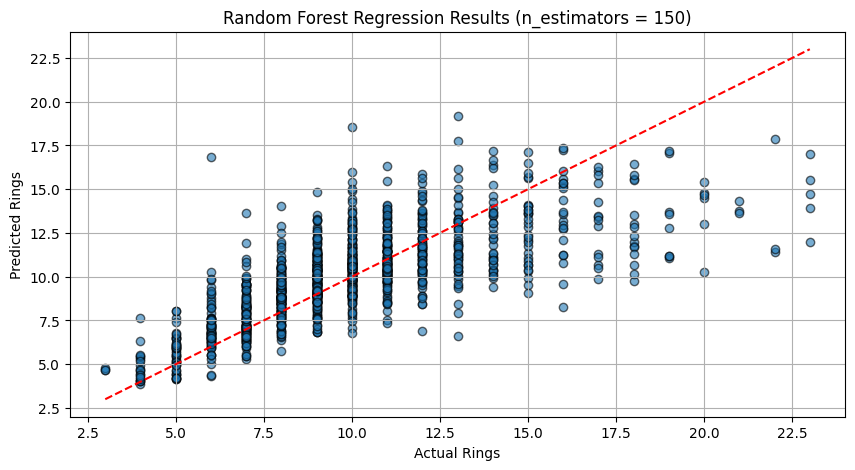

In [14]:
#scatter plot actual and predicted
plt.figure(figsize=(10, 5))
plt.scatter(y_test, rf_predictions, alpha=0.6, edgecolors='k')
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')

plt.title(f'Random Forest Regression Results (n_estimators = {best_n_estimators})')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.grid()
plt.show()

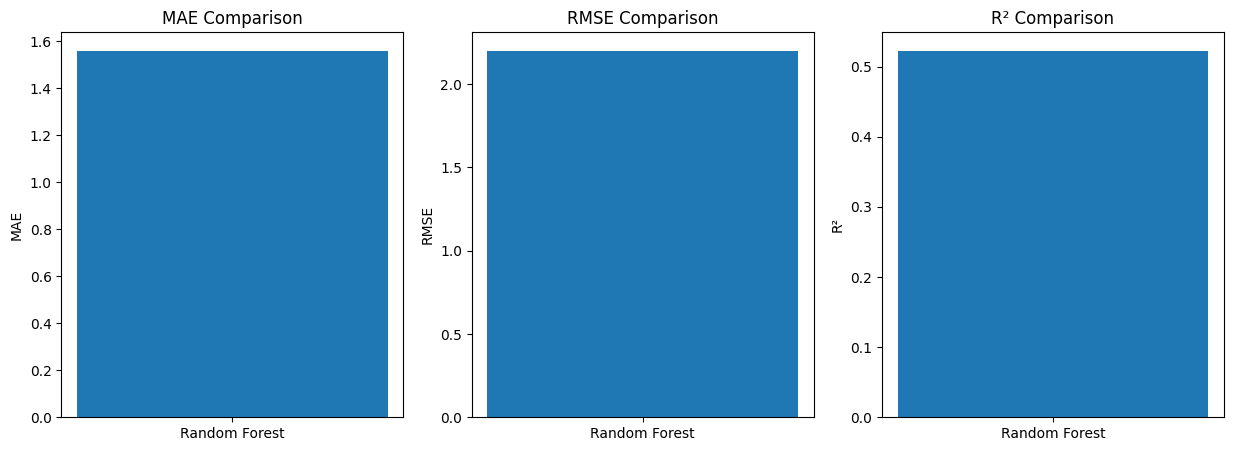

In [15]:
#chart
models = ['Random Forest']
mae_values = [mae]
rmse_values = [rmse]
r2_values = [r2]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(models, mae_values)
axes[0].set_title('MAE Comparison')
axes[0].set_ylabel('MAE')

axes[1].bar(models, rmse_values)
axes[1].set_title('RMSE Comparison')
axes[1].set_ylabel('RMSE')

axes[2].bar(models, r2_values)
axes[2].set_title('R² Comparison')
axes[2].set_ylabel('R²')

plt.show()

In [16]:
#summary
print("Random forest regression result Summary:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

Random forest regression result Summary:
MAE: 1.5606
RMSE: 2.2010
R²: 0.5229
